<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/QM_dissipation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

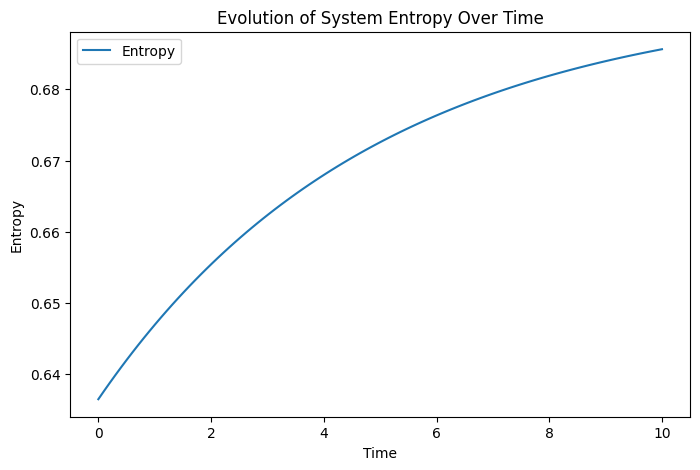

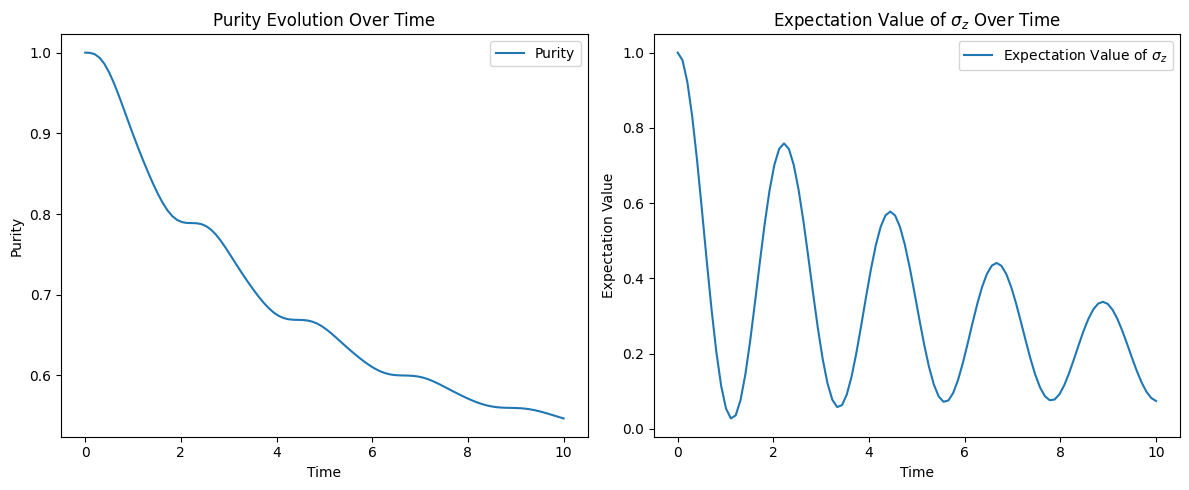

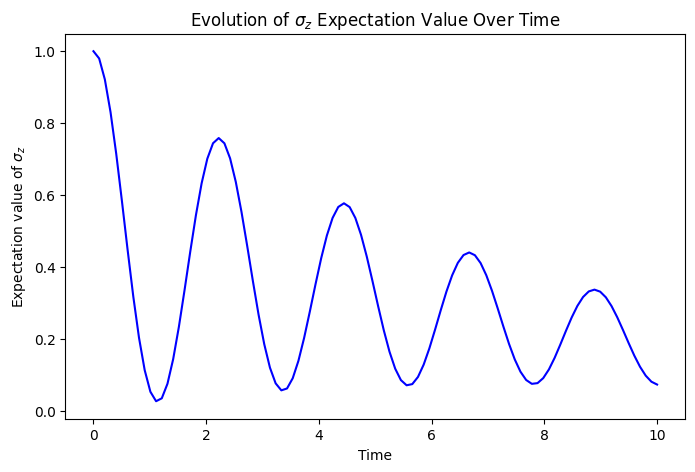

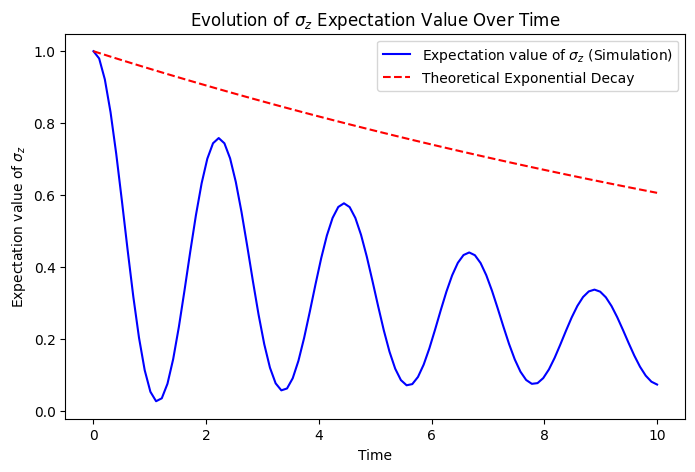

In [9]:
!pip install qutip numpy


import numpy as np
from qutip import *


def von_neumann_entropy(rho):
    """
    Calculate the von Neumann entropy of a quantum state.
    rho: Density matrix of the quantum state.
    """
    eigenvalues = rho.eigenenergies()
    # Filter out zero eigenvalues to avoid log(0)
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    entropy = -np.sum(non_zero_eigenvalues * np.log(non_zero_eigenvalues))
    return entropy


# Define the Hamiltonian of a two-level system
omega = 1.0  # Energy level spacing
H = omega * sigmaz()  # Simple Hamiltonian

# Initial state: thermal state at a given temperature
def thermal_state(temperature):
    """
    Return the thermal state of a two-level system at the given temperature.
    """
    beta = 1 / temperature  # Inverse temperature
    return thermal_dm(2, beta)

temperature = 1.0  # Example temperature
rho0 = thermal_state(temperature)

# Define Lindblad operators for decoherence (example: amplitude damping)
gamma = 0.05  # Decoherence rate
c_ops = [np.sqrt(gamma) * sigmax()]  # Amplitude damping

# Time steps for simulation
times = np.linspace(0, 10, 100)


# Solve the master equation
result = mesolve(H, rho0, times, c_ops, [])

# Calculate the entropy at each time step
entropies = [von_neumann_entropy(state) for state in result.states]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(times, entropies, label='Entropy')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.title('Evolution of System Entropy Over Time')
plt.legend()
plt.show()

def effective_hamiltonian(H, T, S_operator):
    """
    Construct the effective Hamiltonian incorporating temperature and entropy.
    H: The original Hamiltonian of the system.
    T: Temperature.
    S_operator: A quantum operator representing the entropy term.
    """
    return H - T * S_operator

def thermal_lindblad_operators(T, system_size=2):
    """
    Generate Lindblad operators modeling interaction with a thermal bath.
    T: Temperature.
    system_size: Optional. The size or dimension of the quantum system. Default is 2 for a single qubit.
    """
    gamma = 0.1 * T  # Simplified model; in reality, this would be more complex
    if system_size == 2:  # Assuming a single qubit for simplicity
        return [np.sqrt(gamma) * sigmaz()]
    else:
        # For larger systems, you'll need to adjust this part to correctly model the interaction
        # This is a placeholder and should be tailored to your specific system
        return [np.sqrt(gamma) * tensor(sigmaz(), qeye(system_size - 1))]

# Assuming H_eff correctly represents the single-qubit system's effective Hamiltonian
# and psi0 is the initial state of that qubit
c_ops_thermal = thermal_lindblad_operators(T)

# Make sure the Hamiltonian, initial state, and Lindblad operators are defined for the same quantum system
result = mesolve(H_eff, psi0, times, c_ops_thermal, [])


# Define your system parameters, Hamiltonian, and initial state
H = sigmaz()  # Example Hamiltonian
T = 1.0  # Temperature
S_operator = sigmax()  # Simplified model for entropy-related effects
H_eff = effective_hamiltonian(H, T, S_operator)

# Initial state
psi0 = basis(2, 0)  # Example initial state

# Time steps for the simulation
times = np.linspace(0, 10, 100)

# Solve the master equation with thermal effects
result = mesolve(H_eff, psi0, times, thermal_lindblad_operators(T, 2), [])

# Visualization or further analysis...

# Calculate purity at each time step
purity = [state.purity() for state in result.states]

# Calculate the expectation value of sigma_z at each time step
expectation_values = [expect(sigmaz(), state) for state in result.states]

# Additional Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(times, purity, label='Purity')
plt.xlabel('Time')
plt.ylabel('Purity')
plt.title('Purity Evolution Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(times, expectation_values, label='Expectation Value of $\\sigma_z$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.title('Expectation Value of $\\sigma_z$ Over Time')
plt.legend()

plt.tight_layout()
plt.show()

#####

# Calculate the expectation value of sigma_z over time
expect_sigma_z = expect(result.states, sigmaz())

# Plotting the expectation value of sigma_z
plt.figure(figsize=(8, 5))
plt.plot(times, expect_sigma_z, label='Expectation value of $\\sigma_z$ (Simulation)', color='blue')
plt.xlabel('Time')
plt.ylabel('Expectation value of $\\sigma_z$')
plt.title('Evolution of $\\sigma_z$ Expectation Value Over Time')

#######

# Compute the theoretical expectation value of sigma_z using exponential decay
# Convert the state vector psi0 to a density matrix if it's not already
rho0 = ket2dm(psi0)


# Ensure psi0 is a density matrix for consistent expectation value calculations
if not psi0.isket:
    initial_expect_sigma_z = expect(sigmaz(), psi0)  # This should work directly if psi0 is a density matrix
else:
    rho0 = ket2dm(psi0)  # Convert to density matrix if psi0 is a ket
    initial_expect_sigma_z = expect(sigmaz(), rho0)  # Calculate the expectation value from the density matrix

theoretical_expect_sigma_z = initial_expect_sigma_z * np.exp(-gamma * times)

# Now, compute the initial expectation value of sigma_z correctly
initial_expect_sigma_z = expect(sigmaz(), rho0)  # Note the order of arguments

# Compute the theoretical expectation value of sigma_z using exponential decay
theoretical_expect_sigma_z = initial_expect_sigma_z * np.exp(-gamma * times)

# Continue with plotting as before...
plt.figure(figsize=(8, 5))
plt.plot(times, expect_sigma_z, label='Expectation value of $\\sigma_z$ (Simulation)', color='blue')
plt.plot(times, theoretical_expect_sigma_z, label='Theoretical Exponential Decay', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Expectation value of $\\sigma_z$')
plt.title('Evolution of $\\sigma_z$ Expectation Value Over Time')
plt.legend()
plt.show()
